### Naive Bayes

In [1]:
#email_preprocess
#!/usr/bin/python

import pickle
import cPickle
import numpy
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "r")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "r")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    ### features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)
    
    features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print "no. of Chris training emails:", sum(labels_train)
    print "no. of Sara training emails:", len(labels_train)-sum(labels_train)
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [5]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# the classifier
clf = GaussianNB()

# train
t0 = time()
clf.fit(features_train, labels_train)
print "\nTraining Time:", round(time()-t0, 3), "s"

# predict
t0 = time()
pred = clf.predict(features_test)
print "Predicting Time:", round(time()-t0, 3), "s"

accuracy = accuracy_score(pred, labels_test)

print '\nAccuracy = {0}'.format(accuracy)
#########################################################




no. of Chris training emails: 7936
no. of Sara training emails: 7884

Training Time: 0.965 s
Predicting Time: 0.153 s

Accuracy = 0.973265073948


### SVM

In [4]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel = 'linear', C=1)
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
print(sum(clf.predict(features_test) ==1))
print "prediction time:", round(time()-t0, 3), "s"
print(clf.score(features_test, labels_test))



#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 151.786 s
881
prediction time: 16.075 s
0.9840728100113766


In [6]:
#!/usr/bin/python


## Same code as above but added to lines to speed up the training set, but it is on a smaller training set.
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel = 'linear', C=1)
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
print(sum(clf.predict(features_test) ==1))
print "prediction time:", round(time()-t0, 3), "s"
print(clf.score(features_test, labels_test))



#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 0.085 s
1046
prediction time: 0.856 s
0.8845278725824801


In [7]:
#!/usr/bin/python


## Same code as above but changed 'linear' to 'rbf' to SVM
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel = 'rbf', C=1)
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
print(sum(clf.predict(features_test) ==1))
print "prediction time:", round(time()-t0, 3), "s"
print(clf.score(features_test, labels_test))



#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 0.096 s
1540
prediction time: 0.972 s
0.6160409556313993


In [12]:
#!/usr/bin/python


## Same code as above but changed the values of C (tried 10, 100, 1000, 10000)
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features_train = features_train[:len(features_train)/100]
labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel = 'rbf', C=10000)
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
print(sum(clf.predict(features_test) ==1))
print "prediction time:", round(time()-t0, 3), "s"
print(clf.score(features_test, labels_test))



#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 0.089 s
1018
prediction time: 0.787 s
0.8924914675767918


In [13]:
#!/usr/bin/python


## Same code as above but removed the lines limiting the training set
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = SVC(kernel = 'rbf', C=10000)
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
print(sum(clf.predict(features_test) ==1))
print "prediction time:", round(time()-t0, 3), "s"
print(clf.score(features_test, labels_test))



#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 99.749 s
877
prediction time: 9.97 s
0.9908987485779295


In [15]:
#!/usr/bin/python


## Same code as above but are now extracting predictions from an SVM
## Just to be clear, the data point numbers that we give here (10, 26, 50) assume a zero-indexed list. 
## So the correct answer for element #100 would be found using something like answer=predictions[100]


""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


#########################################################
### your code goes here ###
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = SVC(kernel = 'rbf', C=10000)
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t1 = time()
pred = clf.predict(features_test)

print ("After Classifying, the accuracy of SVM author identifier is:")
print accuracy_score(pred,labels_test)
print " predict for element 10 of the test set? The 26th? The 50th? ",pred[10],pred[26],pred[50]

count = 0
for ii in pred:
    if ii == 1:
        count += 1
print "No of predicted Chris's emails are: ",count


#########################################################

no. of Chris training emails: 7936
no. of Sara training emails: 7884
training time: 102.14 s
After Classifying, the accuracy of SVM author identifier is:
0.9908987485779295
 predict for element 10 of the test set? The 26th? The 50th?  1 0 1
No of predicted Chris's emails are:  877


## Decision Trees


In [37]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)


#########################################################


no. of Chris training emails: 7936
no. of Sara training emails: 7884
0.9766780432309442


In [22]:
print features_train.shape

(15820L, 3785L)


In [43]:
'''go into ../tools/email_preprocess.py, and find the line of code that looks like this:
selector = SelectPercentile(f_classif, percentile=10)
Change percentile from 10 to 1, and rerun dt_author_id.py.'''
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)


# Answer should be (15820L, 379L), not sure why I am not getting it.

print features_train.shape

no. of Chris training emails: 7936
no. of Sara training emails: 7884
0.9783845278725825
(15820L, 3785L)


# Choose your own algorithm

### k nearest neighbors

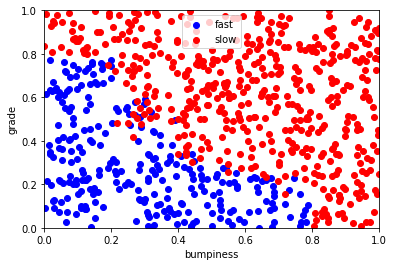

0.92


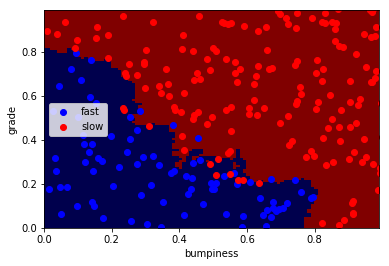

In [10]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
import numpy as np

clf = neighbors.KNeighborsClassifier()
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)







try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


### random forest

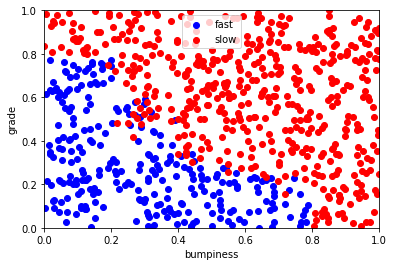

0.928


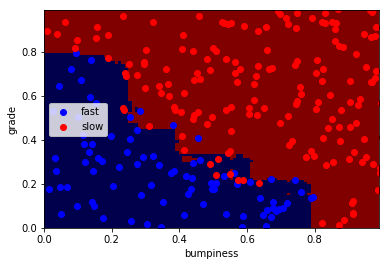

In [12]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)







try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


### adaboost (sometimes also called boosted decision tree)


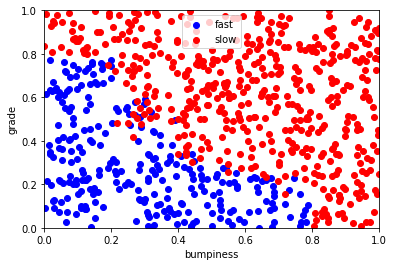

0.924


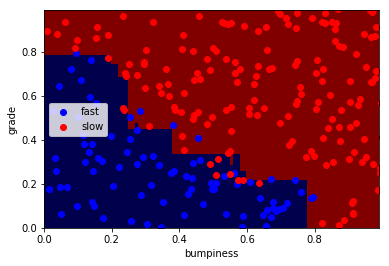

In [14]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)







try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass
